In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, ttest_ind, wilcoxon, mannwhitneyu
from statsmodels.stats.anova import AnovaRM
from statsmodels.formula.api import ols


In [178]:
pre_survey = pd.read_csv("pre_test_survey.csv")
post_survey = pd.read_csv("post_test_survey.csv")
memflip_data = pd.read_csv("memflip_data.csv")
srpm_scores = pd.read_csv("srpm_scores.csv")

pre_survey = pre_survey.drop(columns=["Timestamp"])
post_survey = post_survey.drop(columns=["Timestamp"])

# Logging the difference between pre_test_results and post_test_results
srpm_scores['score_diff'] = srpm_scores['post_test_results'] - srpm_scores['pre_test_results']

In [179]:
# Normalizing stage1_pairs and stage3_correct
memflip_data['stage1_pairs'] = memflip_data['stage1_pairs'] / 6

max_correct_answers = {"Choice1": 15, "Choice2": 26, "Choice3": 16}
memflip_data['stage3_correct'] = memflip_data['stage3_correct'] / max_correct_answers[memflip_data['game_choice'].iloc[0]]

memflip_data['stage4_positions'] = memflip_data['stage4_positions'] / 100

In [180]:
full_data = srpm_scores.merge(pre_survey, on=["player_name","game_mode"])
full_data = full_data.merge(post_survey, on=["player_name","game_mode"])


full_data

## Analyzing SRPM scores

In [181]:
print(srpm_scores[["pre_test_results", "post_test_results"]].describe())

       pre_test_results  post_test_results
count         15.000000          15.000000
mean          54.266667          56.866667
std            3.990465           3.020564
min           48.000000          50.000000
25%           51.000000          55.500000
50%           55.000000          58.000000
75%           57.500000          59.000000
max           60.000000          60.000000


In [182]:
t_stat, p_val = ttest_rel(srpm_scores['pre_test_results'], srpm_scores['post_test_results'])
print(f"T-test results: t={t_stat}, p={p_val}")

T-test results: t=-3.6322594277096836, p=0.0027188216455447498


In [183]:
t_stat, p_val = wilcoxon(srpm_scores['pre_test_results'], srpm_scores['post_test_results'])
print(f"T-test results: t={t_stat}, p={p_val}")

T-test results: t=1.5, p=0.004840730646118985


c:\Users\Muw\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:3145: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


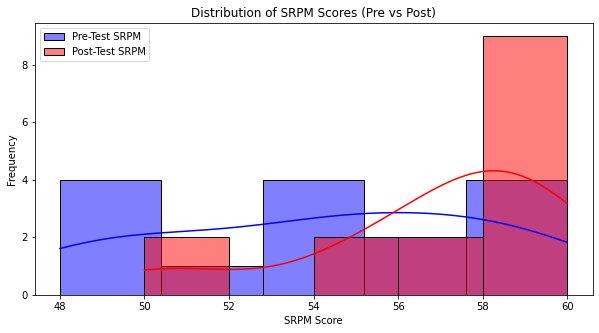

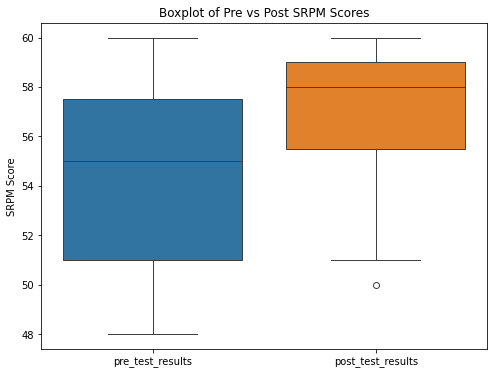

In [184]:
# Visualization
plt.figure(figsize=(10,5))
sns.histplot(srpm_scores['pre_test_results'], label="Pre-Test SRPM", kde=True, color='blue', alpha=0.5)
sns.histplot(srpm_scores['post_test_results'], label="Post-Test SRPM", kde=True, color='red', alpha=0.5)
plt.legend()
plt.title("Distribution of SRPM Scores (Pre vs Post)")
plt.xlabel("SRPM Score")
plt.ylabel("Frequency")
plt.show()

# Boxplot for direct comparison
plt.figure(figsize=(8,6))
sns.boxplot(data=srpm_scores[['pre_test_results', 'post_test_results']])
plt.title("Boxplot of Pre vs Post SRPM Scores")
plt.ylabel("SRPM Score")
plt.show()

Correlation between self-perceived improvement and actual improvement

Pearson correlation: r=0.2510501058893646, p=0.3667715051391363
Spearman correlation: r=0.41566154921622817, p=0.12334229957277112


C:\Users\Muw\AppData\Local\Temp\ipykernel_2928\3471498827.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="srpm_easier", y="score_diff", data=full_data, palette="coolwarm")


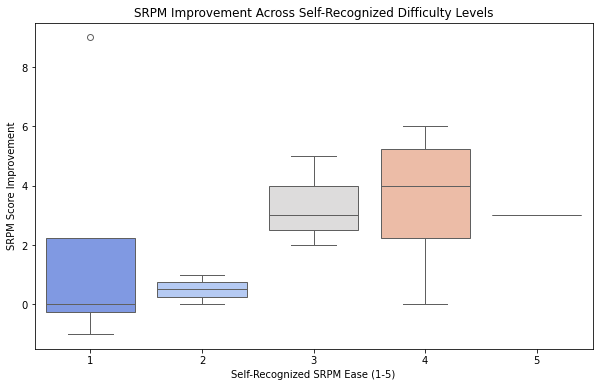

In [185]:
from scipy.stats import pearsonr, spearmanr

# Compute correlation
pearson_corr, pearson_p = pearsonr(full_data['srpm_easier'], full_data['score_diff'])
spearman_corr, spearman_p = spearmanr(full_data['srpm_easier'], full_data['score_diff'])

print(f"Pearson correlation: r={pearson_corr}, p={pearson_p}")
print(f"Spearman correlation: r={spearman_corr}, p={spearman_p}")

# Box plot: Compare SRPM score improvements across different self-reported levels
plt.figure(figsize=(10,6))
sns.boxplot(x="srpm_easier", y="score_diff", data=full_data, palette="coolwarm")
plt.title("SRPM Improvement Across Self-Recognized Difficulty Levels")
plt.xlabel("Self-Recognized SRPM Ease (1-5)")
plt.ylabel("SRPM Score Improvement")
plt.show()

### Comparing easy and hard modes

In [186]:
t_stat, p_val = ttest_ind(srpm_scores[srpm_scores["game_mode"]=="Mode 1"]["score_diff"],
                          srpm_scores[srpm_scores["game_mode"]=="Mode 2"]["score_diff"])
print(f"T-test results: t={t_stat}, p={p_val}")

T-test results: t=0.7727120030199989, p=0.4535133584689004


In [187]:
u_stat, p_val = mannwhitneyu(srpm_scores[srpm_scores["game_mode"]=="Mode 1"]["score_diff"],
                          srpm_scores[srpm_scores["game_mode"]=="Mode 2"]["score_diff"])
print(f"Mann-Whitney test results: U={u_stat}, p={p_val}")

Mann-Whitney test results: U=38.5, p=0.23815773774631432


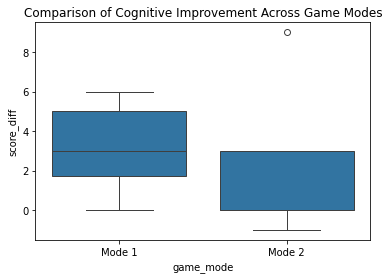

In [188]:
sns.boxplot(x="game_mode", y="score_diff", data=srpm_scores)
plt.title("Comparison of Cognitive Improvement Across Game Modes")
plt.show()

C:\Users\Muw\AppData\Local\Temp\ipykernel_2928\2764657256.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='game_mode', y='score_diff', data=srpm_scores, palette=['lightblue', 'salmon'])


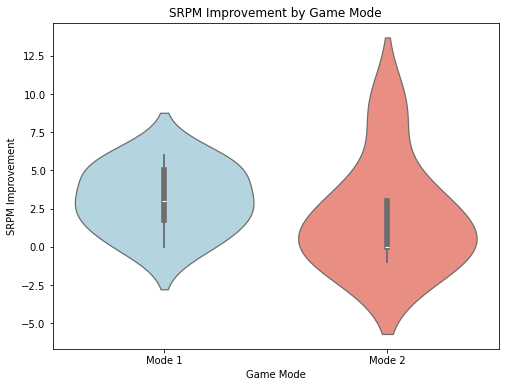

In [189]:
# Visualization
plt.figure(figsize=(8,6))
sns.violinplot(x='game_mode', y='score_diff', data=srpm_scores, palette=['lightblue', 'salmon'])
plt.title("SRPM Improvement by Game Mode")
plt.xlabel("Game Mode")
plt.ylabel("SRPM Improvement")
plt.show()

## Survey Analysis

### Self-Reported Cognitive Ability

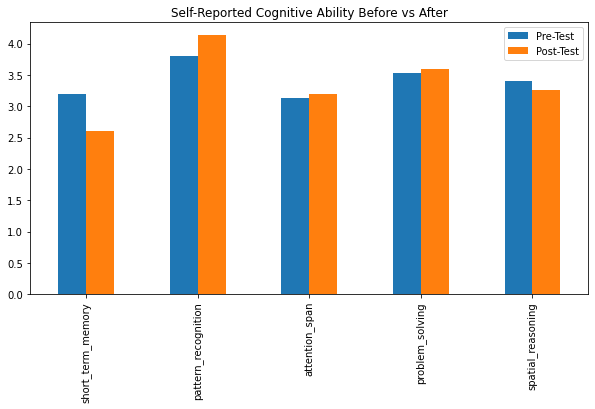

In [190]:
survey_columns = ["short_term_memory", "pattern_recognition", "attention_span", "problem_solving", "spatial_reasoning"]
pre_means = pre_survey[survey_columns].mean()
post_means = post_survey[survey_columns].mean()

comparison_df = pd.DataFrame({"Pre-Test": pre_means, "Post-Test": post_means})
comparison_df.plot(kind="bar", figsize=(10,5), title="Self-Reported Cognitive Ability Before vs After")
plt.show()


### Difficulty Ratings (Game Stages)

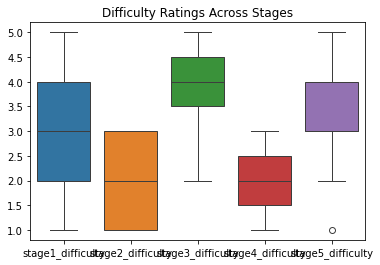

In [191]:
difficulty_stages = ["stage1_difficulty", "stage2_difficulty", "stage3_difficulty", "stage4_difficulty", "stage5_difficulty"]
sns.boxplot(data=post_survey[difficulty_stages])
plt.title("Difficulty Ratings Across Stages")
plt.show()


### Difficulty Ratings (Game Choices)

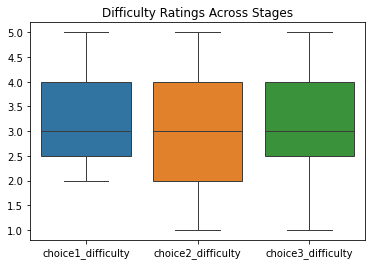

In [192]:
difficulty_choices = ["choice1_difficulty", "choice2_difficulty", "choice3_difficulty"]
sns.boxplot(data=post_survey[difficulty_choices])
plt.title("Difficulty Ratings Across Stages")
plt.show()


### Engagement & Perception Analysis

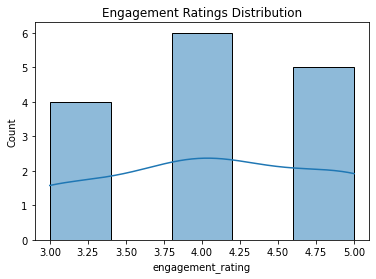

In [193]:
sns.histplot(post_survey["engagement_rating"], bins=5, kde=True)
plt.title("Engagement Ratings Distribution")
plt.show()


### Survey Data Sentiment Analysis

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

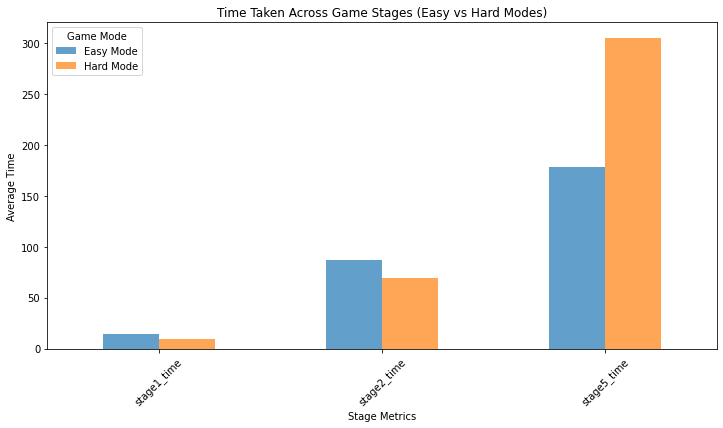

<Figure size 864x432 with 0 Axes>

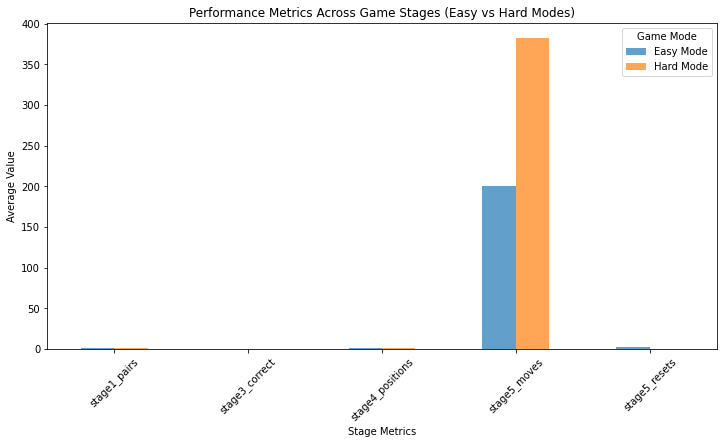

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split into easy and hard mode
easy_mode = memflip_data[memflip_data['game_mode'] == 'easy']
hard_mode = memflip_data[memflip_data['game_mode'] == 'hard']

# Remove non-numeric, unnecessary columns
numeric_columns = memflip_data.select_dtypes(include=['number']).columns

# Compute average performance per stage
stage_metrics_easy = easy_mode.groupby("game_choice")[numeric_columns].mean()
stage_metrics_hard = hard_mode.groupby("game_choice")[numeric_columns].mean()

# Visualization
plt.figure(figsize=(12,6))

# Separate time-related metrics and other metrics
time_metrics = ['stage1_time', 'stage2_time', 'stage5_time']
combined_metrics = pd.concat([stage_metrics_easy.mean(), stage_metrics_hard.mean()], axis=1)
other_metrics = [col for col in combined_metrics.index if col not in time_metrics]

# Plot time-related metrics
plt.figure(figsize=(12, 6))
combined_metrics.loc[time_metrics].plot(kind='bar', figsize=(12, 6), alpha=0.7)
plt.title("Time Taken Across Game Stages (Easy vs Hard Modes)")
plt.ylabel("Average Time")
plt.xlabel("Stage Metrics")
plt.xticks(rotation=45)
plt.legend(title="Game Mode")
plt.show()

# Plot other metrics
plt.figure(figsize=(12, 6))
combined_metrics.loc[other_metrics].plot(kind='bar', figsize=(12, 6), alpha=0.7)
plt.title("Performance Metrics Across Game Stages (Easy vs Hard Modes)")
plt.ylabel("Average Value")
plt.xlabel("Stage Metrics")
plt.xticks(rotation=45)
plt.legend(title="Game Mode")
plt.show()


Post-game improvement

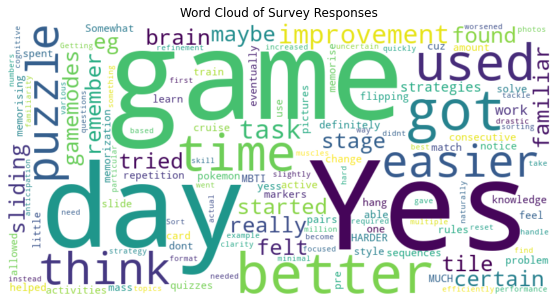

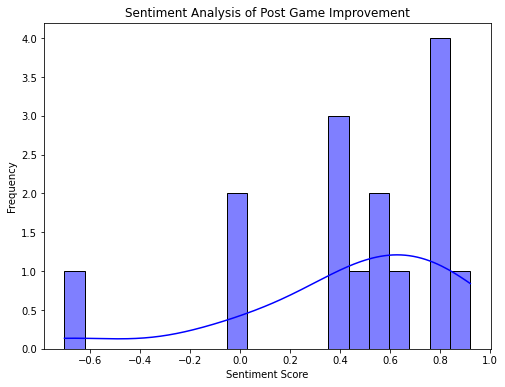

In [196]:
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

post_sentiment = post_survey

# Generate word cloud
text = ' '.join(post_sentiment['post_game_improvement'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Survey Responses")
plt.show()

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
post_sentiment['improvement_sentiment'] = post_sentiment['post_game_improvement'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Visualize sentiment distribution
plt.figure(figsize=(8,6))
sns.histplot(post_sentiment['improvement_sentiment'], bins=20, kde=True, color='blue')
plt.title("Sentiment Analysis of Post Game Improvement")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


Likes about MemFlip

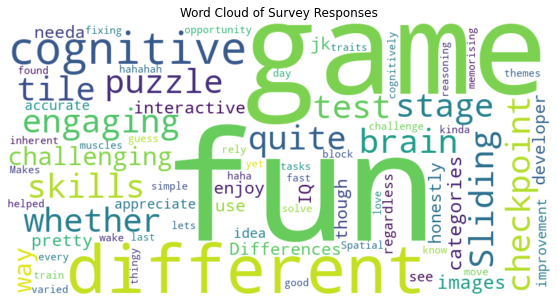

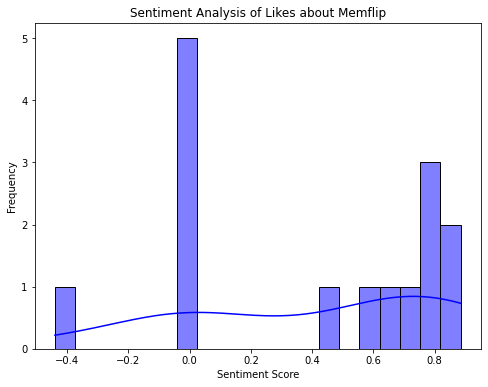

In [197]:
like_sentiment = post_survey

# Generate word cloud
text = ' '.join(like_sentiment['memflip_like'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Survey Responses")
plt.show()

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
like_sentiment['like_sentiment'] = like_sentiment['memflip_like'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Visualize sentiment distribution
plt.figure(figsize=(8,6))
sns.histplot(like_sentiment['like_sentiment'], bins=20, kde=True, color='blue')
plt.title("Sentiment Analysis of Likes about Memflip")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


Dislikes about MemFlip

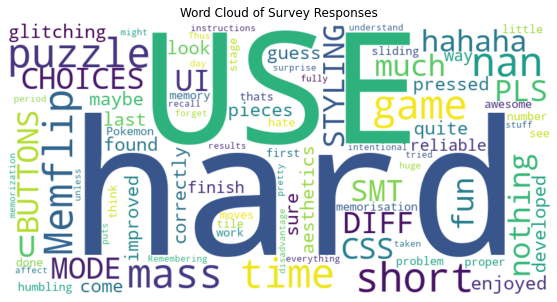

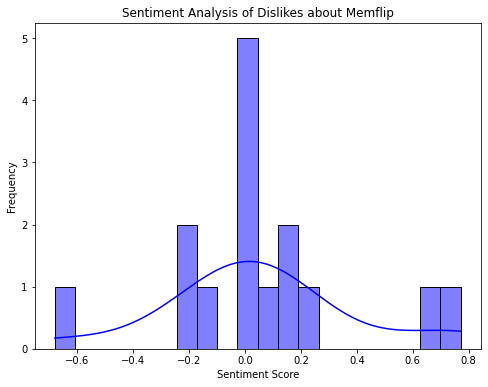

In [198]:
dislike_sentiment = post_survey

# Ensure all values in the 'memflip_dislike' column are strings
dislike_sentiment['memflip_dislike'] = dislike_sentiment['memflip_dislike'].astype(str)

# Generate word cloud
text = ' '.join(dislike_sentiment['memflip_dislike'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Survey Responses")
plt.show()

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
dislike_sentiment['dislike_sentiment'] = dislike_sentiment['memflip_dislike'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Visualize sentiment distribution
plt.figure(figsize=(8,6))
sns.histplot(dislike_sentiment['dislike_sentiment'], bins=20, kde=True, color='blue')
plt.title("Sentiment Analysis of Dislikes about Memflip")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


MemFlip Feedback

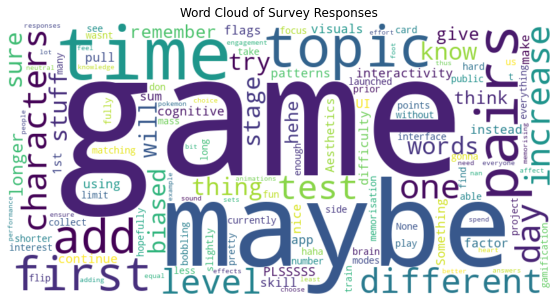

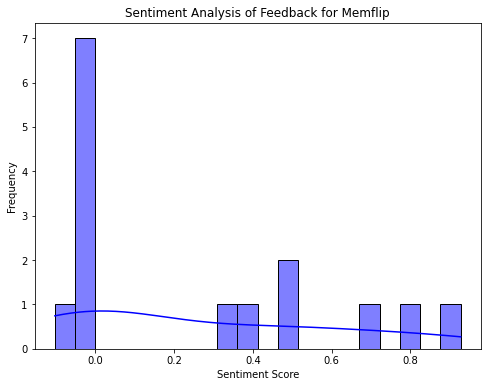

In [199]:
memflip_feedback = post_survey

# Ensure all values in the 'memflip_dislike' column are strings
memflip_feedback['memflip_feedback'] = memflip_feedback['memflip_feedback'].astype(str)

# Generate word cloud
text = ' '.join(memflip_feedback['memflip_feedback'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Survey Responses")
plt.show()

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
memflip_feedback['memflip_feedback'] = memflip_feedback['memflip_feedback'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Visualize sentiment distribution
plt.figure(figsize=(8,6))
sns.histplot(memflip_feedback['memflip_feedback'], bins=20, kde=True, color='blue')
plt.title("Sentiment Analysis of Feedback for Memflip")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


Study feedback

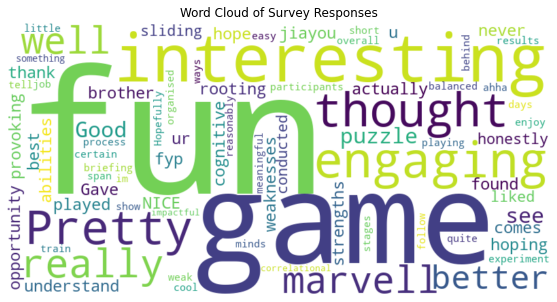

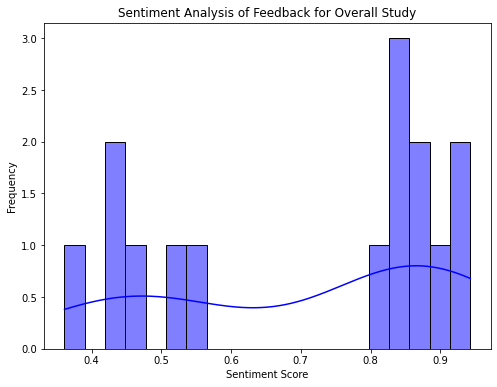

In [200]:
study_feedback = post_survey

# Ensure all values in the 'memflip_dislike' column are strings
study_feedback['study_feedback'] = study_feedback['study_feedback'].astype(str)

# Generate word cloud
text = ' '.join(study_feedback['study_feedback'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Survey Responses")
plt.show()

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
study_feedback['study_feedback'] = study_feedback['study_feedback'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Visualize sentiment distribution
plt.figure(figsize=(8,6))
sns.histplot(study_feedback['study_feedback'], bins=20, kde=True, color='blue')
plt.title("Sentiment Analysis of Feedback for Overall Study")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()
